### TP Final de Aprendizaje Automático
El dataset a usar es **Employee Productivity and Satisfaction HR Data**, tomado de [Kaggle](https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data).

Este dataset recopila información respecto a la productividad y desempeño de empleados, teniendo en cuenta algunas características.

In [168]:
import numpy as np # manejo de arreglos, álgebra lineal
import pandas as pd # pandas para procesamiento de archivos

df = pd.read_csv('hr_dashboard_data.csv')

# Veamos que tenemos
df.head()


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


# 1. Análisis inicial del dataset

Vemos que tenemos las siguientes variables:
- nombre (insignificante)
- edad
- género (hay que pasarlo a otro tipo de variable, por ej. bool)
- proyectos completados
- % de productividad
- % de satisfacción
- feedback (de 1 a 5)
- departamento (deberíamos pasarlo a variables dummy)
- posición (deberíamos pasarlo a variable dummy)
- fecha de inicio (deberíamos pasarlo a números para que sea más fácil el análisis)
- salario

Vamos a limpiar un poco el dataset...

In [169]:
dataset = pd.get_dummies(df, columns = ['Gender'])
dataset = pd.get_dummies(dataset, columns = ['Department'])
dataset = pd.get_dummies(dataset, columns = ['Position'])

dataset.head()

,Name,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Joining Date,Salary,Gender_Female,Gender_Male,...,Department_HR,Department_IT,Department_Marketing,Department_Sales,Position_Analyst,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead
0,Douglas Lindsey,25,11,57,25,4.7,Jan-20,63596,False,True,...,False,False,True,False,True,False,False,False,False,False
1,Anthony Roberson,59,19,55,76,2.8,Jan-99,112540,True,False,...,False,True,False,False,False,False,False,True,False,False
2,Thomas Miller,30,8,87,10,2.4,Jan-17,66292,False,True,...,False,True,False,False,True,False,False,False,False,False
3,Joshua Lewis,26,1,53,4,1.4,Jan-22,38303,True,False,...,False,False,True,False,False,True,False,False,False,False
4,Stephanie Bailey,43,14,3,9,4.5,Jan-05,101133,False,True,...,False,True,False,False,False,False,False,False,False,True


In [128]:
# Respecto al tiempo, vamos a simplificarlo convirtiendolo en un número que represente el tiempo en días en la empresa

from datetime import datetime

ds = dataset
ds['Days'] = pd.to_datetime(ds['Joining Date'], format="%b-%y") - datetime.now()
ds['Days'] = ds['Days'] * -1
ds['Days'] = ds['Days'].round('D') # Ver http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.round.html
ds['Days'] = (ds['Days'] / np.timedelta64(1, 'D')).astype(int) # Ver https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe
ds = ds.drop('Joining Date', axis=1)

ds.head()



,Name,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Gender_Female,Gender_Male,Department_Finance,...,Department_IT,Department_Marketing,Department_Sales,Position_Analyst,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead,Days
0,Douglas Lindsey,25,11,57,25,4.7,63596,False,True,False,...,False,True,False,True,False,False,False,False,False,1329
1,Anthony Roberson,59,19,55,76,2.8,112540,True,False,False,...,True,False,False,False,False,False,True,False,False,8999
2,Thomas Miller,30,8,87,10,2.4,66292,False,True,False,...,True,False,False,True,False,False,False,False,False,2424
3,Joshua Lewis,26,1,53,4,1.4,38303,True,False,False,...,False,True,False,False,True,False,False,False,False,598
4,Stephanie Bailey,43,14,3,9,4.5,101133,False,True,False,...,True,False,False,False,False,False,False,False,True,6807


In [129]:
# Nos falta un pequeño detalle, mover la columna objetivo "Salary" (podría ser otra, tal vez % de productividad, feedback score o % de satisfacción para otro análisis similar).

dataset_clean = ds
salary = dataset_clean.pop('Salary')
dataset_clean.insert(len(dataset_clean.columns), 'Salary', salary)

# También, deberíamos descartar la columna Name ya que no aporta nada
dataset_clean.pop('Name')

dataset_clean.head()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Gender_Female,Gender_Male,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Position_Analyst,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead,Days,Salary
0,25,11,57,25,4.7,False,True,False,False,False,True,False,True,False,False,False,False,False,1329,63596
1,59,19,55,76,2.8,True,False,False,False,True,False,False,False,False,False,True,False,False,8999,112540
2,30,8,87,10,2.4,False,True,False,False,True,False,False,True,False,False,False,False,False,2424,66292
3,26,1,53,4,1.4,True,False,False,False,False,True,False,False,True,False,False,False,False,598,38303
4,43,14,3,9,4.5,False,True,False,False,True,False,False,False,False,False,False,False,True,6807,101133


### 2 Análisis de colinearidad, reducción de dimensiones

Ya tenemos el dataset más ordenado, probemos hacer un análisis más estadístico de los datos...

<Axes: >

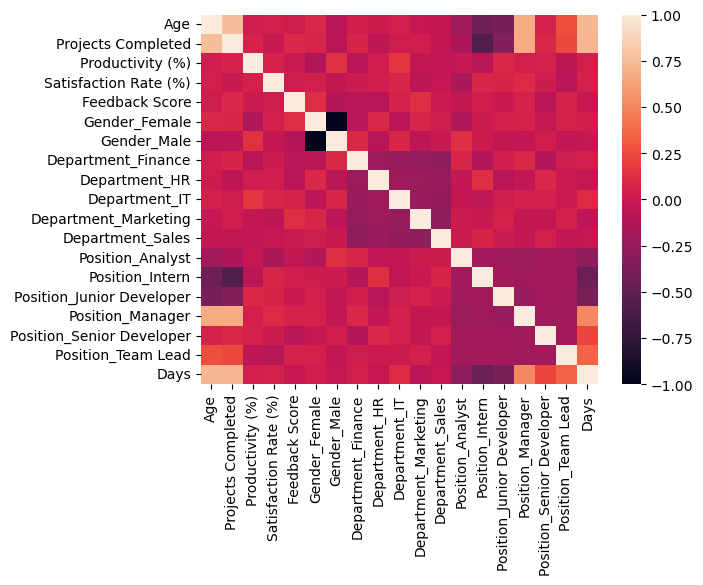

In [130]:
import seaborn as sns

X = dataset_clean.iloc[:,:-1]
y = dataset_clean.iloc[:,-1]
cormat = X.corr()
round(cormat,2)
sns.heatmap(cormat)

In [131]:
# Lo que nos conviene acá, es eliminar las variables cuya correlación es alta
# Guía: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

print(f'Variables originales: {len(X.columns)}')
dataset_modified = X
upper = cormat.where(np.triu(np.ones(cormat.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
dataset_modified = dataset_modified.drop(to_drop, axis=1, inplace=False)

print(f'Variables simplificadas: {len(dataset_modified.columns)}')

# Hacemos un parate acá, suponemos que nos va a simplificar los cálculos y dar resultados similares... pero no necesariamente es así! al final podríamos volver a hacer el análisis sin quitar features

Variables originales: 19
Variables simplificadas: 19


### 3 Implementación de modelos de predicción

In [132]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, log_loss
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = dataset_clean.iloc[:, 0:-1]
y = dataset_clean.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_normalized = scaler.fit_transform(X_train) 
test_normalized = scaler.fit_transform(X_test) 

# Partimos el dataset en 80% de train y 20% de test


In [135]:
# Regresión lineal

regr = LinearRegression()
  
regr.fit(train_normalized, y_train)
y_pred = regr.predict(test_normalized)
# La métrica usada por detrás es el r2
print(regr.score(test_normalized, y_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficientes: ", regr.coef_) # Valores de la regresión lineal



0.9388246267465353
MSE: 47729173.66
Coeficientes:  [ 1.55783614e+03  4.33663674e+02  3.48400212e+02  1.57621122e+02
  3.87827769e+01 -2.63182321e+02  2.63182321e+02  2.70804394e+01
 -1.06878654e+02  2.88272397e+01  3.32824082e+01  7.74530246e+00
 -2.87683883e+03 -1.43871030e+04 -8.54569257e+03  1.28821704e+04
  3.70791187e+03  8.74220277e+03 -1.31358043e+03]


Nos da un 0.93 de score, es muy alto! (era medio obvio igual, porque casi seguro que hay una relación linear entre salario y edad/años en la empresa, etc.).
De todas maneras, creemos que tiene un MSE muy alto (si bien varía en función del tamaño de la variable objetivo que al ser salario es alta)... no estamos seguros de porqué.

In [139]:
# Veamos con LogisticRegressor

logisticRegr = LogisticRegression()
logisticRegr.fit(train_normalized, y_train)

predictions = logisticRegr.predict(test_normalized)

score = logisticRegr.score(test_normalized, y_test)
print(score)

# Tiene sentido que me de 0 (no?!) porque no es un problema de clasificación binaria...


0.0


In [140]:
# Probemos hacer una predicción usando XGBoost, un método moderno usado en datos tabulares (https://arxiv.org/abs/2106.03253)

import xgboost as xgb # Hay que instalar el paquete con: pip install xgboost

# XGBoost
xg_reg = xgb.XGBRegressor()

xg_reg.fit(train_normalized,y_train)

preds = xg_reg.predict(test_normalized)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("R2:", xg_reg.score(test_normalized,y_test))


RMSE: 6366.709914
R2: 0.9480455397217641


Tiene un score más alto, y reduce mucho el error medio a comparación del regresor linear! Parece que XGBoost aplica bien para este problema. Probemos una última vez con RandomForrest

In [177]:
from sklearn.ensemble import RandomForestRegressor # Ver https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
 
regressor.fit(train_normalized, y_train)
score = regressor.score(train_normalized, y_train)
y_pred = regressor.predict(test_normalized)

mse = mean_squared_error(y_test, y_pred)

print(score)
print(mse)

0.9933789346961952
36067165.62644752


Nos dió un muy buen valor!

### 4 Análisis de modelos sobre otras variables

Hasta acá hicimos un análisis muy superficial de este dataset, solamente revisamos si es posible predecir el salario en base a ciertos parámetros de entrada. Pero, sería interesante ver si encontramos otras relaciones entre los datos: productividad vs salario? productividad vs satisfacción? cómo se divide entre los departamentos?
Podremos hacer el ejercicio de predecir productividad/satisfacción en base a lo otro?

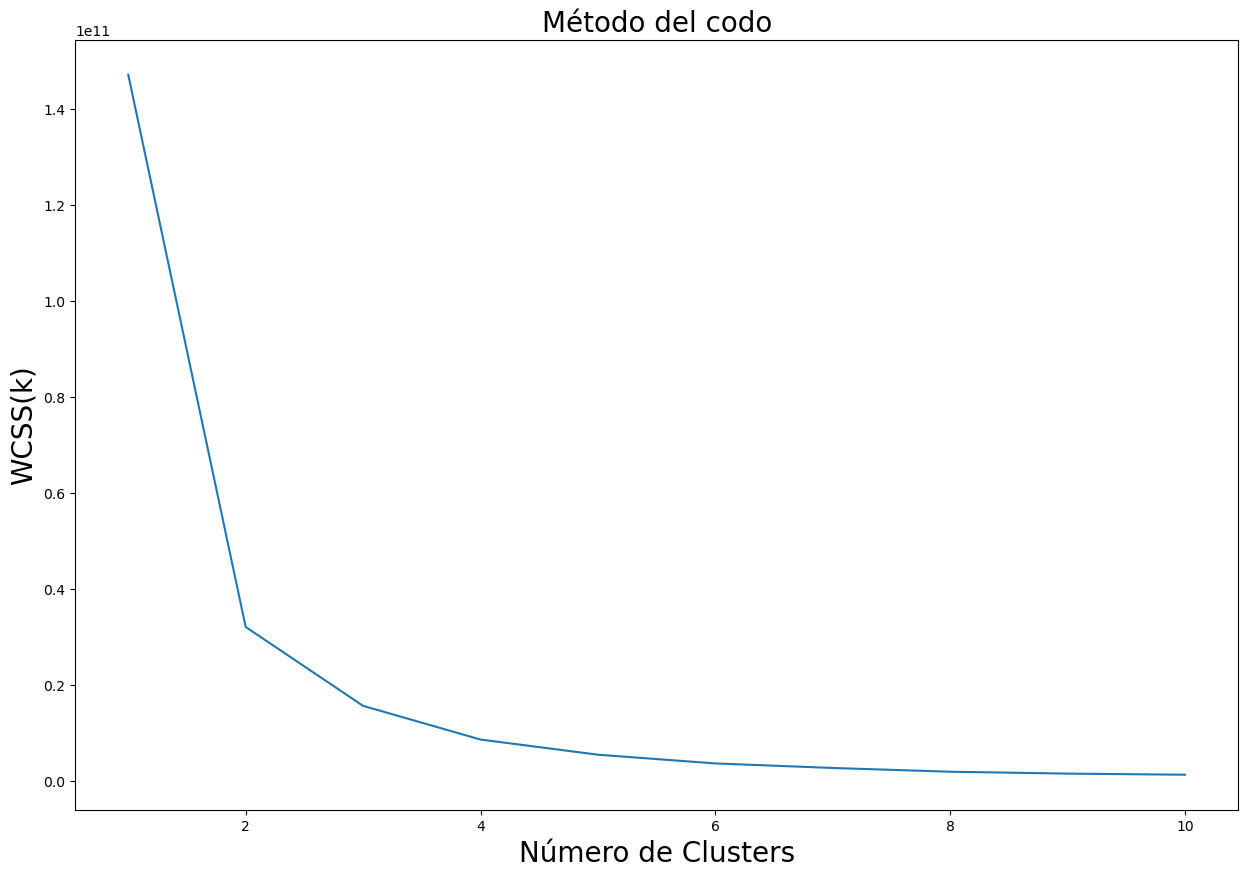

In [149]:
# Probemos ver si encontramos alguna agrupación de los datos
import matplotlib.pyplot as plt

X = dataset_clean.iloc[:,:].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 10)) 
plt.plot(range(1,11), wcss)
plt.title("Método del codo", fontsize=20)
plt.xlabel("Número de Clusters", fontsize=20)
plt.ylabel("WCSS(k)", fontsize=20)
plt.show()

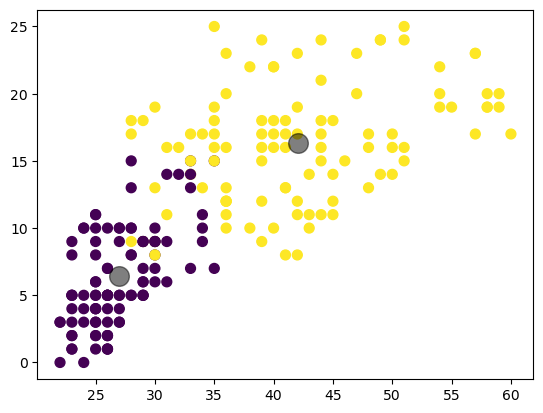

In [173]:
# Vemos que con 2 clusters estamos bien, pero para graficar tenemos que tener mucho cuidado porque solamente vamos a ver 2 variables... tal vez podríamos haber aplicado PCA antes y ver que nos daba

kmeans = KMeans(n_clusters = 2, init="k-means++", max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') # Agarro Age y Projects Completed para elegir 2 variables a dibujar

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Nos topamos con un problema: es imposible graficar la relación entre los clusters si tenemos más de 2 variables, cómo hacemos para mirar en un espacio de 19-20 variables? Vamos a agregarle a cada fila del dataset su cluster correspondiente, nos puede servir para entender mejor el agrupamiento!

In [176]:
dataset['Cluster'] = y_kmeans
dataset.head()

dataset.to_csv("hr_dashboard_data_clustered.csv", index=False)

Otra forma de haber planteado esto es aplicando PCA para reducir a 2 dimensiones el problema...

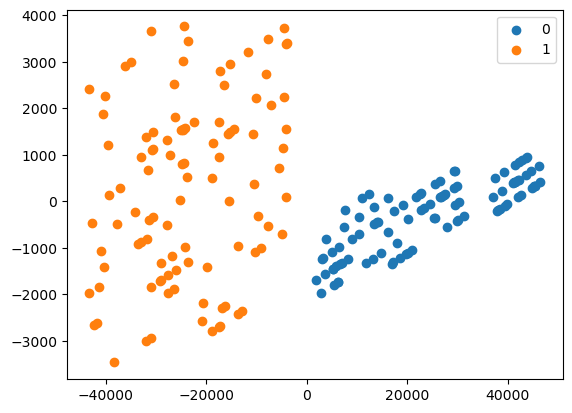

In [171]:
from sklearn.decomposition import PCA

X = dataset_clean.iloc[:,:].values
pca = PCA(n_components=2)

pca.fit(X)

dataset_pca = pca.fit_transform(X)

from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2, n_init='auto')
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset_pca)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(dataset_pca[label == i , 0] , dataset_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

Se ve mucho mejor el gráfico ya que se ven claramente 2 clusters bien separados. Pero, qué significa cada cosa? donde cae cada fila de nuestro dataset original? Tal vez pueda ser para otro análisis...

### 5 Extra: predicción de productividad-feedback-satisfacción

Vamos a probar ver si podemos hacer una regresión multivariada... pero no vamos a ir con una regresión

In [180]:
dataset_clean.head()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Gender_Female,Gender_Male,Department_Finance,Department_HR,Department_IT,...,Department_Sales,Position_Analyst,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead,Days,Salary,Cluster
0,25,11,57,25,4.7,False,True,False,False,False,...,False,True,False,False,False,False,False,1329,63596,0
1,59,19,55,76,2.8,True,False,False,False,True,...,False,False,False,False,True,False,False,8999,112540,1
2,30,8,87,10,2.4,False,True,False,False,True,...,False,True,False,False,False,False,False,2424,66292,0
3,26,1,53,4,1.4,True,False,False,False,False,...,False,False,True,False,False,False,False,598,38303,0
4,43,14,3,9,4.5,False,True,False,False,True,...,False,False,False,False,False,False,True,6807,101133,1


In [212]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

# Acomodamos el dataset
dataset_new = dataset_clean

#dataset_new.pop('Cluster')

productivity = dataset_new.pop('Productivity (%)')
satisfaction = dataset_new.pop('Satisfaction Rate (%)')
feedback = dataset_new.pop('Feedback Score')
dataset_new.insert(len(dataset_new.columns), 'Productivity (%)', productivity)
dataset_new.insert(len(dataset_new.columns), 'Satisfaction Rate (%)', satisfaction)
dataset_new.insert(len(dataset_new.columns), 'Feedback Score', feedback)


X = dataset_new.iloc[:, 0:-3]
y = dataset_new.iloc[:, -3:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_normalized = scaler.fit_transform(X_train) 
test_normalized = scaler.fit_transform(X_test) 

model = KNeighborsRegressor()

model.fit(train_normalized, y_train)

#y_pred = model.predict(y_test)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, test_normalized, y_test, cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print(model.score(train_normalized, y_train))
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

0.1909842391790032
MAE: 1.197 (1.539)


Esta predicción es muy mala!!! tal vez nuestro enfoque no sea el correcto para intentar hacer una predicción de este estilo.

# TODO

Podemos buscar otro método u otro enfoque para el problema (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html):


In [209]:

# define base model
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR


model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model, order=[0,1,2])

X = dataset_new.iloc[:, 0:-3]
y = dataset_new.iloc[:, -3:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_normalized = scaler.fit_transform(X_train) 
test_normalized = scaler.fit_transform(X_test) 

# define base model
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, train_normalized, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.778 (0.981)
[0.4231980753023448, 0.5448590843813986, 0.2055557473962879, 0.31413383794406274, 0.5210259317982323, 1.0280947605390407, 0.9580766142617324, 0.2844668197892786, 5.69086553872796, 0.7609222443520798, 0.6463439167725652, 1.1025227286417965, 0.56405959758771, 0.2837293854005383, 0.38324480271966227, 0.6842065108108049, 0.7457343514979984, 0.18477773265994357, 1.27675176375216, 0.5883646856227676, 0.663089383592149, 0.6596213604172547, 0.6530897915045494, 0.49492290686622126, 0.06917639097751098, 0.17496092962246998, 0.4024751825307715, 0.5111554367727433, 0.641230942510219, 1.868137727636609]


/home/erik/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/erik/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/erik/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/erik/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/erik/.local/lib/python3.11/site-packag